<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/M_odule18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

data = load_breast_cancer()

In [11]:
X = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.Series(data.target)
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [13]:
y.value_counts()

,count
1,357
0,212


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)
print(X_train.shape[0])
print(X_test.shape[0])

426
143


In [19]:
rf_baseline = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
)
rf_baseline.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rf_baseline.predict(X_test)

In [24]:
print("Accuracy Score =",accuracy_score(y_test,y_pred))

Accuracy Score = 0.958041958041958


In [25]:
print(classification_report(y_test,y_pred,target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.92      0.94        53
      benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



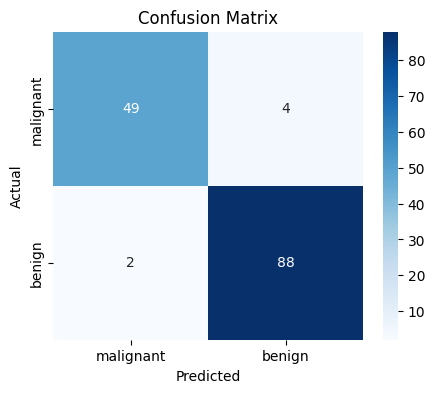

In [27]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
#Features Importance
importance = pd.Series(
    rf_baseline.feature_importances_,
    index=X.columns
).sort_values(ascending=False)


In [29]:
importance.head(10)

,0
worst area,0.149674
worst concave points,0.127189
mean concave points,0.104650
worst radius,0.086963
worst perimeter,0.080299
mean perimeter,0.080037
mean concavity,0.055420
mean radius,0.053665
mean area,0.044062
area error,0.024557


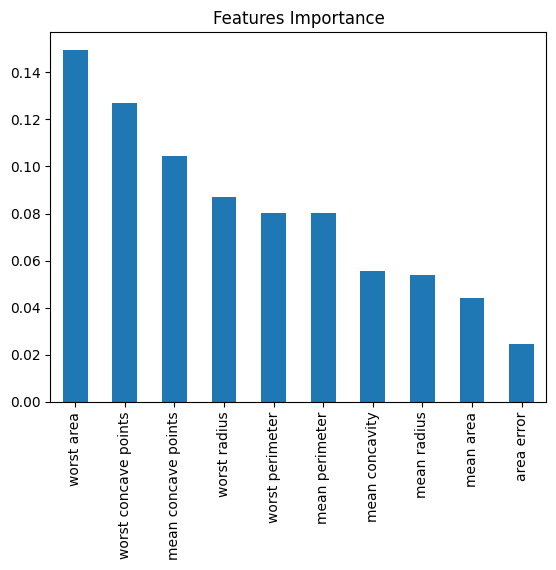

In [30]:
plt.figure()
importance.head(10).plot(kind="bar")
plt.title("Features Importance")
plt.show()

In [31]:
#Key Hyperparameters
param_grid={
    "n_estimators": [100,150,175,200],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2,3,5],
    "max_features": ["sqrt", "log2"]
}

In [32]:
#GridSearchCV for Tuning
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 150, 175, 200]},
             scoring='f1')

In [33]:
#Showing outputs
print("Best parameters found:")
print(grid_rf.best_params_)

Best parameters found:
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 100}


In [34]:
#Evaluating the Tuned Model
best_rf = grid_rf.best_estimator_
y_pred_best = best_rf.predict(X_test)

print(classification_report(y_test, y_pred_best, target_names=data.target_names))


              precision    recall  f1-score   support

   malignant       0.96      0.92      0.94        53
      benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

